In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [42]:
income = pd.read_csv('adult.csv')
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [43]:
covid = pd.read_csv('covid19_patient_symptoms_diagnosis.csv')
covid.head()

,patient_id,age,gender,fever,dry_cough,sore_throat,fatigue,headache,shortness_of_breath,loss_of_smell,loss_of_taste,oxygen_level,body_temperature,comorbidity,travel_history,contact_with_patient,chest_pain,covid_result
0,1,52,Male,1,0,1,1,0,0,0,0,98,37.1,Diabetes,0,0,0,0
1,2,15,Male,0,0,0,1,1,0,0,0,85,37.7,Diabetes,0,1,0,0
2,3,72,Male,1,0,1,0,0,1,0,1,99,36.8,NaN,0,0,0,0
3,4,61,Female,0,0,1,1,1,0,1,1,86,36.0,NaN,1,0,0,0
4,5,21,Female,1,1,0,0,0,1,0,1,90,36.4,NaN,1,1,1,1


In [44]:
categorical_columns = ['fever', 'dry_cough', 'sore_throat',
       'fatigue', 'headache', 'shortness_of_breath', 'loss_of_smell',
       'loss_of_taste', 'travel_history', 'contact_with_patient', 'chest_pain']
values = {0:'No', 1:'Yes'}
for col in categorical_columns:
    covid[col] = covid[col].map(values)
covid['covid_result'] = covid['covid_result'].map({0:'Negative', 1:'Positive'})
covid.head()

,patient_id,age,gender,fever,dry_cough,sore_throat,fatigue,headache,shortness_of_breath,loss_of_smell,loss_of_taste,oxygen_level,body_temperature,comorbidity,travel_history,contact_with_patient,chest_pain,covid_result
0,1,52,Male,Yes,No,Yes,Yes,No,No,No,No,98,37.1,Diabetes,No,No,No,Negative
1,2,15,Male,No,No,No,Yes,Yes,No,No,No,85,37.7,Diabetes,No,Yes,No,Negative
2,3,72,Male,Yes,No,Yes,No,No,Yes,No,Yes,99,36.8,NaN,No,No,No,Negative
3,4,61,Female,No,No,Yes,Yes,Yes,No,Yes,Yes,86,36.0,NaN,Yes,No,No,Negative
4,5,21,Female,Yes,Yes,No,No,No,Yes,No,Yes,90,36.4,NaN,Yes,Yes,Yes,Positive


In [45]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   patient_id            5000 non-null   int64  
 1   age                   5000 non-null   int64  
 2   gender                5000 non-null   object 
 3   fever                 5000 non-null   object 
 4   dry_cough             5000 non-null   object 
 5   sore_throat           5000 non-null   object 
 6   fatigue               5000 non-null   object 
 7   headache              5000 non-null   object 
 8   shortness_of_breath   5000 non-null   object 
 9   loss_of_smell         5000 non-null   object 
 10  loss_of_taste         5000 non-null   object 
 11  oxygen_level          5000 non-null   int64  
 12  body_temperature      5000 non-null   float64
 13  comorbidity           2275 non-null   object 
 14  travel_history        5000 non-null   object 
 15  contact_with_patient 

In [46]:
covid.describe()

,patient_id,age,oxygen_level,body_temperature
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,44.380600,91.934200,38.500480
std,1443.520003,25.551632,4.300275,1.431892
min,1.000000,1.000000,85.000000,36.000000
25%,1250.750000,22.000000,88.000000,37.300000
50%,2500.500000,44.000000,92.000000,38.500000
75%,3750.250000,66.000000,96.000000,39.700000
max,5000.000000,89.000000,99.000000,41.000000


In [47]:
covid.isna().sum()

patient_id                 0
age                        0
gender                     0
fever                      0
dry_cough                  0
sore_throat                0
fatigue                    0
headache                   0
shortness_of_breath        0
loss_of_smell              0
loss_of_taste              0
oxygen_level               0
body_temperature           0
comorbidity             2725
travel_history             0
contact_with_patient       0
chest_pain                 0
covid_result               0
dtype: int64

In [48]:
covid['comorbidity'] = covid['comorbidity'].fillna('Unknown')

In [49]:
covid.isna().sum()

patient_id              0
age                     0
gender                  0
fever                   0
dry_cough               0
sore_throat             0
fatigue                 0
headache                0
shortness_of_breath     0
loss_of_smell           0
loss_of_taste           0
oxygen_level            0
body_temperature        0
comorbidity             0
travel_history          0
contact_with_patient    0
chest_pain              0
covid_result            0
dtype: int64

In [50]:
symptom_columns = ['fever', 'dry_cough', 'sore_throat',
       'fatigue', 'headache', 'shortness_of_breath', 'loss_of_smell',
       'loss_of_taste', 'travel_history', 'contact_with_patient', 'chest_pain']

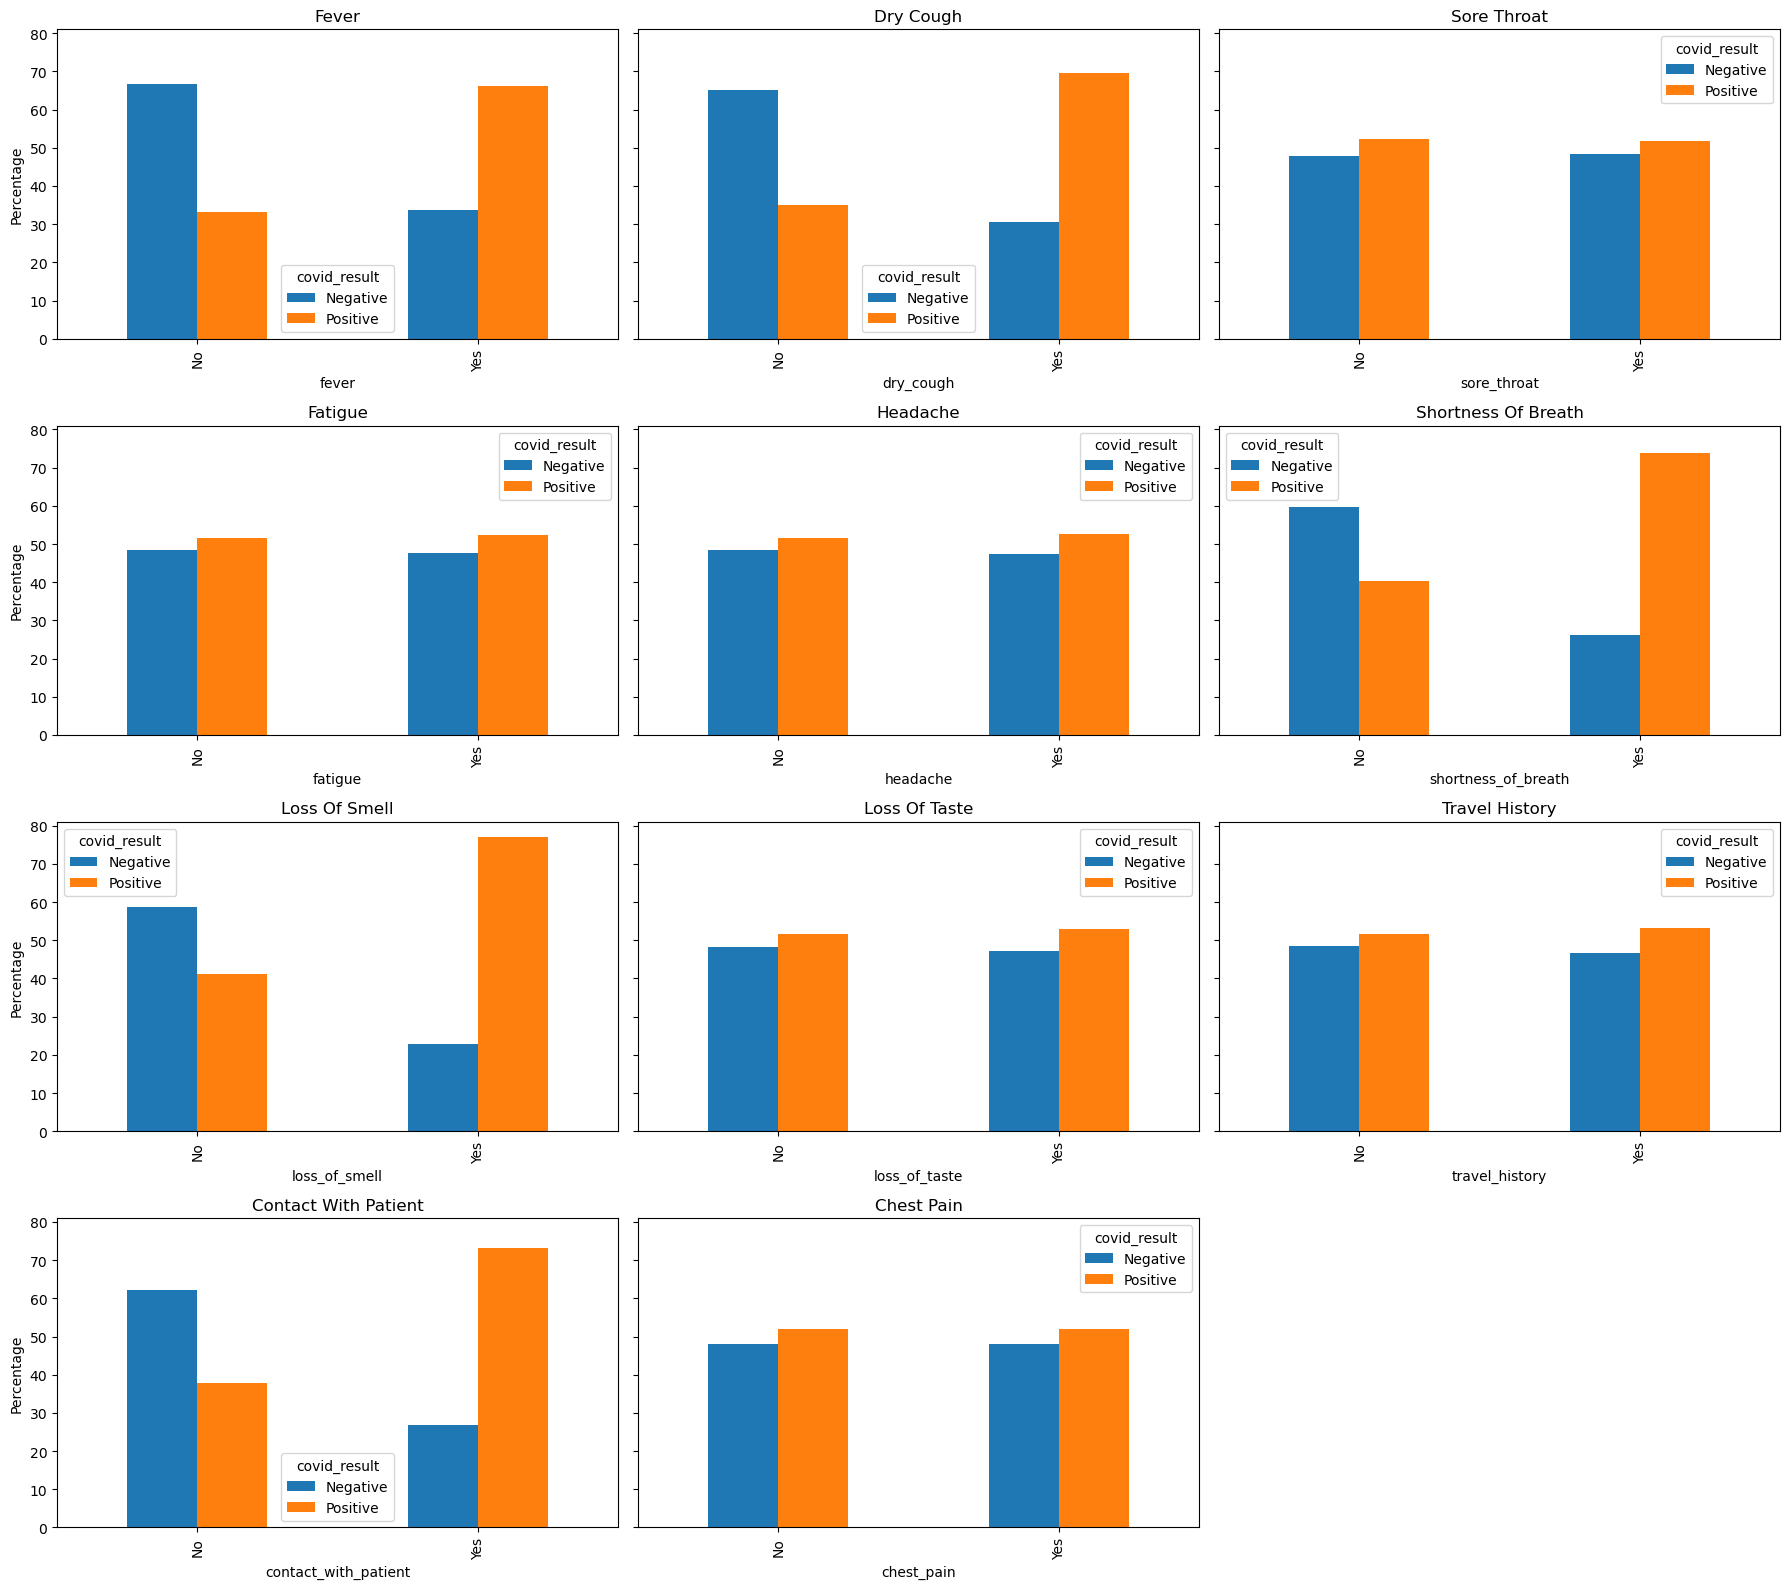

In [51]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18,16), sharey=True)
axes=axes.flatten()
for ax, col in zip(axes, symptom_columns):
    grouped = covid.groupby(col)['covid_result'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
    grouped.columns = [col, 'covid_result', 'percentage']
    grouped = grouped.pivot(index=col, columns='covid_result', values='percentage')
    grouped.plot(kind='bar', ax=ax)
    ax.set_title(col.replace('_', ' ').title())
    ax.set_ylabel('Percentage')
for ax in axes[len(symptom_columns):]:
    ax.axis('off')
plt.tight_layout()
plt.show()


In [64]:
percent_yes = []
for col in symptom_columns:
    pct_yes = covid[covid[col] =='Yes']['covid_result'].value_counts(normalize=True).get('Positive', 0)*100
    pct_no = covid[covid[col] =='No']['covid_result'].value_counts(normalize=True).get('Positive', 0)*100
    percent_yes.append({'symptom':col, 'With Symptom':pct_yes, 'Without Symptom': pct_no})
percent_yes = pd.DataFrame(percent_yes)
percent_yes.head()

,symptom,With Symptom,Without Symptom
0,fever,66.302432,33.240869
1,dry_cough,69.545823,34.925020
2,sore_throat,51.682692,52.226027
3,fatigue,52.322821,51.535836
4,headache,52.607914,51.512968


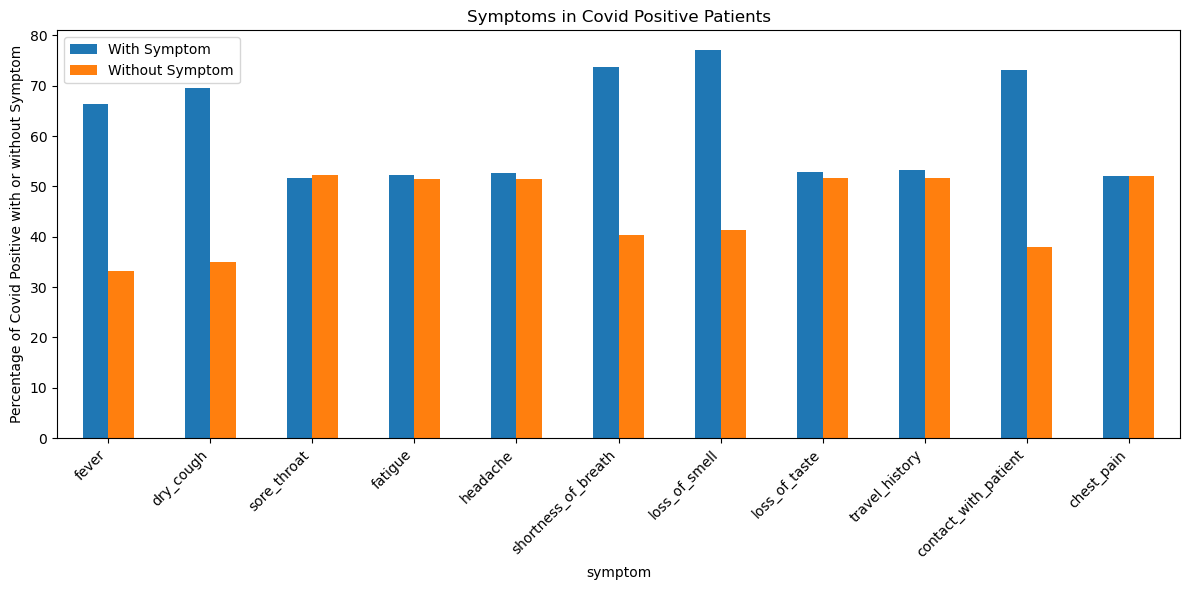

In [65]:
percent_yes.set_index('symptom')[['With Symptom', 'Without Symptom']].plot(kind='bar', figsize=(12,6))
plt.xticks(rotation=45, ha='right')
plt.title('Symptoms in Covid Positive Patients')
plt.ylabel('Percentage of Covid Positive with or without Symptom')
plt.tight_layout()
plt.show()

In [67]:
percent_pos = []
for col in symptom_columns:
    pct_yes = covid[covid['covid_result'] =='Positive'][col].value_counts(normalize=True).get('Yes', 0)*100
    pct_no = covid[covid['covid_result'] =='Negative'][col].value_counts(normalize=True).get('Yes', 0)*100
    percent_pos.append({'symptom':col, 'Covid_Pos':pct_yes, 'Covid_Neg': pct_no})
percent_pos = pd.DataFrame(percent_pos)
percent_pos.head()

,symptom,Covid_Pos,Covid_Neg
0,fever,72.346154,39.833333
1,dry_cough,65.961538,31.291667
2,sore_throat,41.346154,41.875000
3,fatigue,59.346154,58.583333
4,headache,45.000000,43.916667


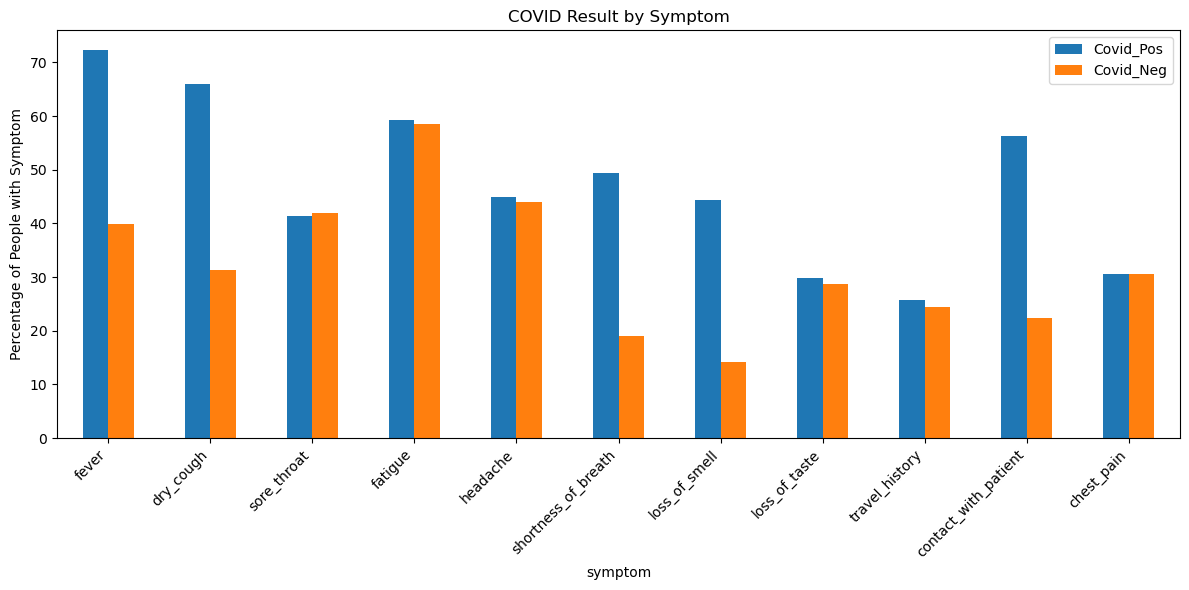

In [69]:
percent_pos.set_index('symptom')[['Covid_Pos', 'Covid_Neg']].plot(kind='bar', figsize=(12,6))
plt.xticks(rotation=45, ha='right')
plt.title('COVID Result by Symptom')
plt.ylabel('Percentage of People with Symptom')
plt.tight_layout()
plt.show()

In [77]:
men = covid[covid['gender'] == 'Male']
women = covid[covid['gender'] == 'Female']

percent_gender = []
for col in symptom_columns:
    pct_men = men[men[col] =='Yes']['covid_result'].value_counts(normalize=True).get('Positive', 0)*100
    pct_women = women[women[col] =='Yes']['covid_result'].value_counts(normalize=True).get('Positive', 0)*100
    percent_gender.append({'symptom':col, 'Men':pct_men, 'Women': pct_women})
percent_gender = pd.DataFrame(percent_gender)

percent_gender.head()


,symptom,Men,Women
0,fever,66.596195,66.008463
1,dry_cough,69.353551,69.744435
2,sore_throat,52.182163,51.169591
3,fatigue,53.722334,50.891632
4,headache,53.172475,52.036199


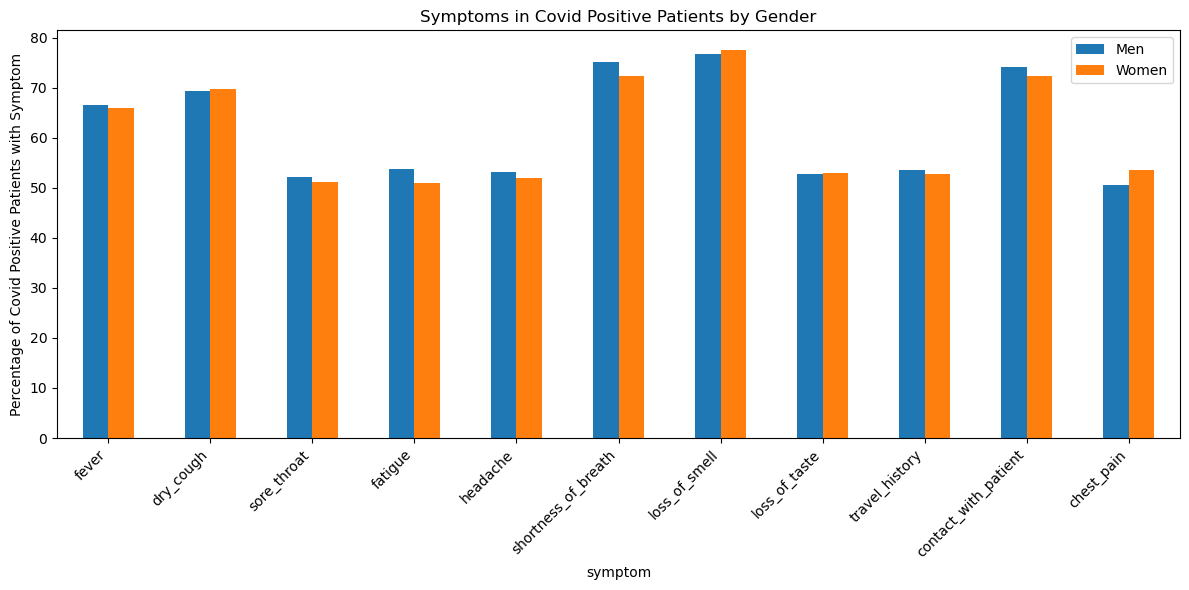

In [78]:
percent_gender.set_index('symptom')[['Men', 'Women']].plot(kind='bar', figsize=(12,6))
plt.xticks(rotation=45, ha='right')
plt.title('Symptoms in Covid Positive Patients by Gender')
plt.ylabel('Percentage of Covid Positive Patients with Symptom')
plt.tight_layout()
plt.show()

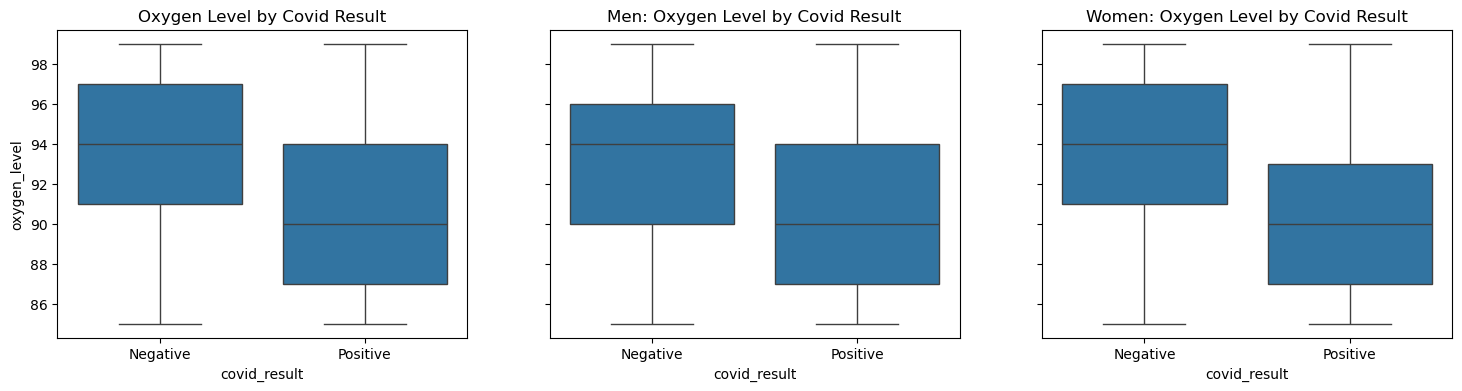

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), sharey=True)
sns.boxplot(data=covid, x='covid_result', y='oxygen_level', ax=ax[0])
sns.boxplot(data=men, x='covid_result', y='oxygen_level', ax=ax[1])
sns.boxplot(data=women, x='covid_result', y='oxygen_level', ax=ax[2])
ax[0].set_title("Oxygen Level by Covid Result")
ax[1].set_title("Men: Oxygen Level by Covid Result")
ax[2].set_title("Women: Oxygen Level by Covid Result")
plt.show()

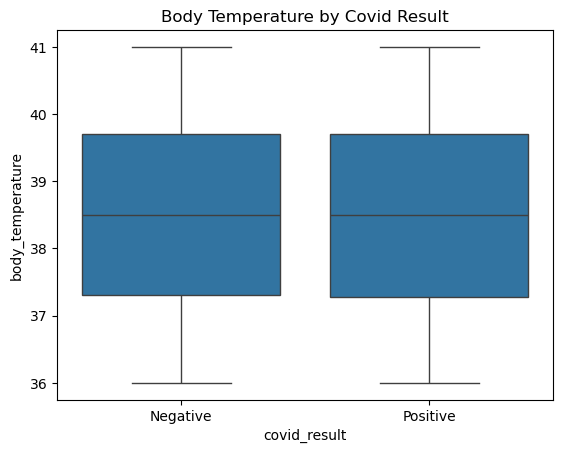

In [72]:
sns.boxplot(data=covid, x='covid_result', y='body_temperature')
plt.title("Body Temperature by Covid Result")
plt.show()

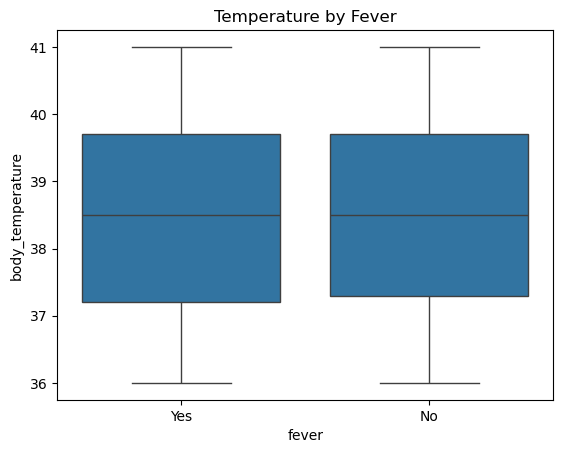

In [73]:
sns.boxplot(data=covid, x='fever', y='body_temperature')
plt.title("Temperature by Fever")
plt.show()

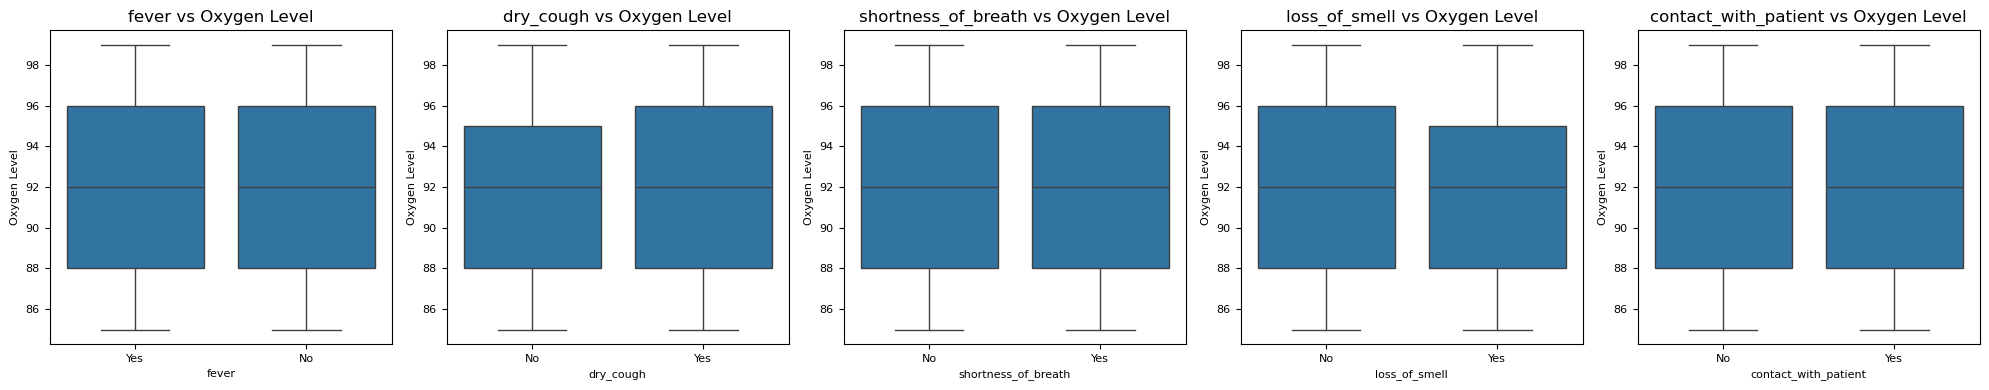

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,4))

# Flatten axes for easy looping
axes = axes.flatten()
symptom_pos = ['fever', 'dry_cough', 'shortness_of_breath', 'loss_of_smell', 'contact_with_patient']
for ax, symptom in zip(axes, symptom_pos):
    sns.boxplot(data=covid, x=symptom, y='oxygen_level', ax=ax)
    ax.set_title(f'{symptom} vs Oxygen Level', fontsize=12)
    ax.set_xlabel(symptom, fontsize=8)
    ax.set_ylabel("Oxygen Level", fontsize=8)
    ax.tick_params(axis='both', labelsize=8)

# If there are empty cells, hide them
for i in range(len(symptom_pos), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
age_groups = ['Under 20', '20 - 34', '35 - 49', '50 - 64', '65 and Older']
age_ranges = [0, 20, 35, 50, 65, np.inf]

covid['age_range'] = pd.cut(covid['age'], labels=age_groups, bins=age_ranges)
covid[['age', 'age_range']].head()

,age,age_range
0,52,50 - 64
1,15,Under 20
2,72,65 and Older
3,61,50 - 64
4,21,20 - 34


In [91]:
under_20 = covid[covid['age_range'] == 'Under 20']
group_34 = covid[covid['age_range'] == '20 - 34']
group_49 = covid[covid['age_range'] == '35 - 49']
group_64 = covid[covid['age_range'] == '50 - 64']
over_65 = covid[covid['age_range'] == '65 and Older']

percent_age = []
for col in symptom_columns:
    pct_20 = under_20[under_20[col] =='Yes']['covid_result'].value_counts(normalize=True).get('Positive', 0)*100
    pct_34 = group_34[group_34[col] =='Yes']['covid_result'].value_counts(normalize=True).get('Positive', 0)*100
    pct_49 = group_49[group_49[col] =='Yes']['covid_result'].value_counts(normalize=True).get('Positive', 0)*100
    pct_64 = group_64[group_64[col] =='Yes']['covid_result'].value_counts(normalize=True).get('Positive', 0)*100
    pct_65 = over_65[over_65[col] =='Yes']['covid_result'].value_counts(normalize=True).get('Positive', 0)*100
    percent_age.append({'symptom':col, 'Under 20':pct_20, '20 - 34':pct_34, '35 - 49':pct_49, '50 - 64':pct_64, '65 and Older':pct_65})
percent_age = pd.DataFrame(percent_age)

percent_age.head()

,symptom,Under 20,20 - 34,35 - 49,50 - 64,65 and Older
0,fever,65.849923,64.660194,67.108168,68.588469,65.778401
1,dry_cough,66.969147,71.824480,68.689320,72.686230,68.580542
2,sore_throat,51.515152,54.755784,50.000000,53.273810,49.714286
3,fatigue,53.254438,49.802372,50.294695,55.278311,52.510176
4,headache,53.386454,51.295337,49.333333,54.314721,53.791887


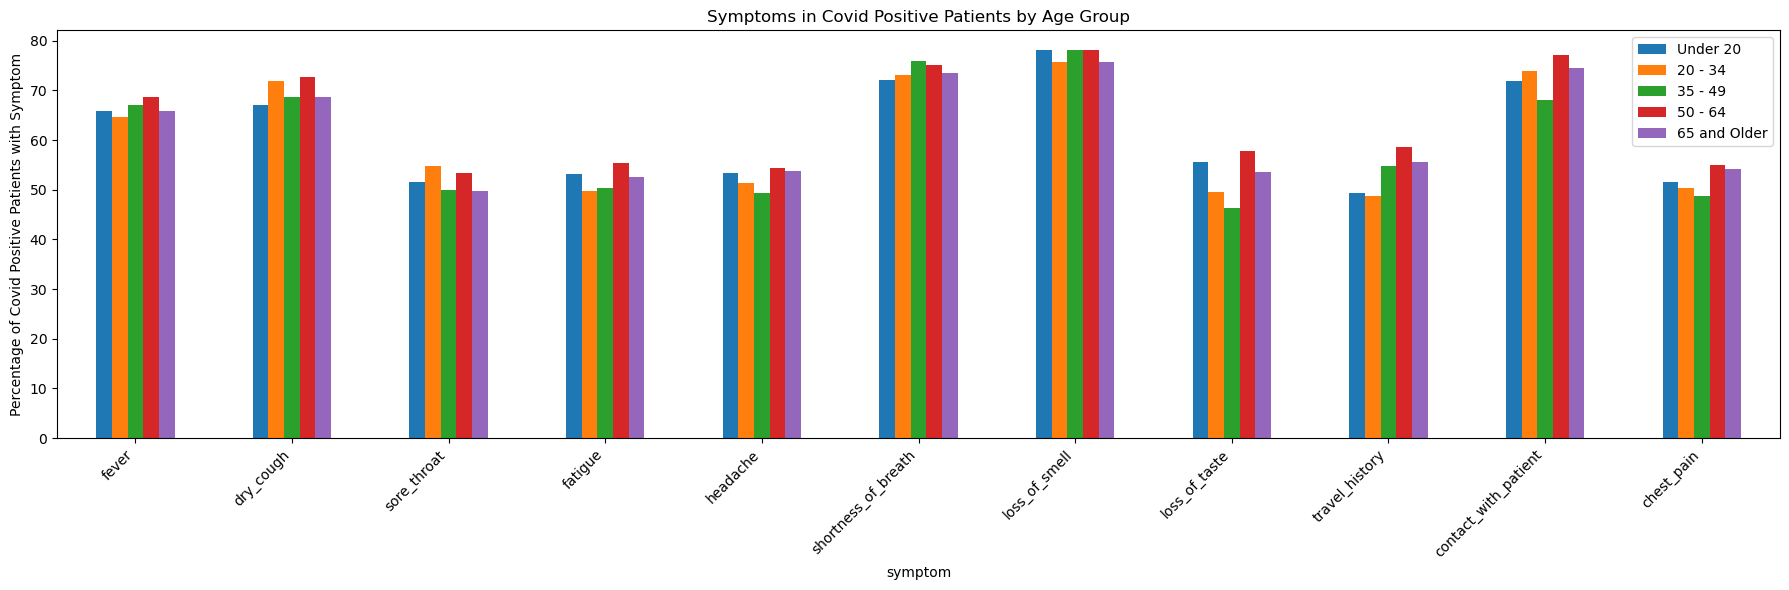

In [93]:
percent_age.set_index('symptom')[['Under 20', '20 - 34', '35 - 49', '50 - 64', '65 and Older']].plot(kind='bar', figsize=(18,6))
plt.xticks(rotation=45, ha='right')
plt.title('Symptoms in Covid Positive Patients by Age Group')
plt.ylabel('Percentage of Covid Positive Patients with Symptom')
plt.tight_layout()
plt.show()

In [94]:
%pip install matplotlib-venn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45437 sha256=31d24955d208f931495022747005fe46ae81c11d91ca487df480641e668a38e6
  Stored in directory: c:\users\ujval\appdata\local\pip\cache\wheels\d1\5f\e6\771479559f992b8398265ebf61f8a3d33ca0b8f75552e06ad2
Successfully built matplotlib-venn
Note: you may need to restart the kernel to use updated packages.


In [95]:
from matplotlib_venn import venn2, venn3 

C:\Users\Ujval\AppData\Local\Temp\ipykernel_10036\4072373832.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  venn_covid[symptom] = venn_covid[symptom].replace({'Yes':True, 'No':False})


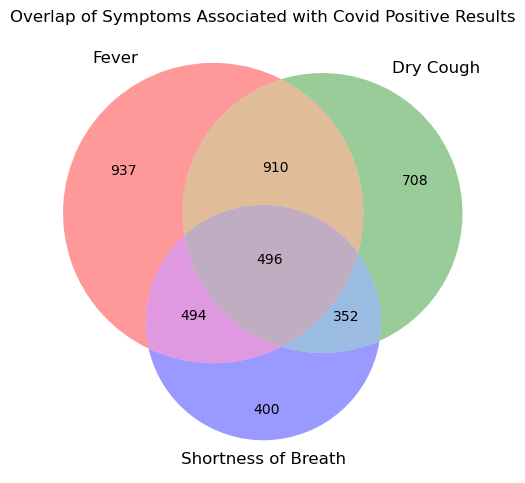

In [106]:
symptom_pos = ['fever', 'dry_cough', 'shortness_of_breath', 'loss_of_smell', 'contact_with_patient']
venn_covid = covid.copy()
venn_covid = venn_covid[['patient_id', 'fever', 'dry_cough', 'shortness_of_breath', 'loss_of_smell', 'contact_with_patient', 'covid_result']]
for symptom in symptom_pos:
    venn_covid[symptom] = venn_covid[symptom].replace({'Yes':True, 'No':False})
fever_set = set(venn_covid.loc[venn_covid['fever'], 'patient_id'])
drycough_set = set(venn_covid.loc[venn_covid['dry_cough'], 'patient_id'])
breath_set = set(venn_covid.loc[venn_covid['shortness_of_breath'], 'patient_id'])
smell_set = set(venn_covid.loc[venn_covid['loss_of_smell'], 'patient_id'])
contact_set = set(venn_covid.loc[venn_covid['contact_with_patient'], 'patient_id'])

plt.figure(figsize=(6,6))
venn3([fever_set, drycough_set, breath_set],
      set_labels=('Fever', 'Dry Cough', 'Shortness of Breath'))
plt.title("Overlap of Symptoms Associated with Covid Positive Results")
plt.show()

In [107]:
%pip install upsetplot

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for upsetplot: filename=upsetplot-0.9.0-py3-none-any.whl size=24914 sha256=fc4d1ea051bba40b8e8a9ae9861711d0ca088516859bd65ac95274d0dbfa6386
  Stored in directory: c:\users\ujval\appdata\local\pip\cache\wheels\25\f7\e8\cf1a20f6721631b3607d04dfd5c31889cf5a512177fa2a0564
Successfully built upsetplot
Note: you may need to restart the kernel to use updated packages.


In [119]:
covid_pos = covid[covid['covid_result'] == 'Positive']
covid_pos = covid_pos[['fever', 'dry_cough', 'shortness_of_breath', 'loss_of_smell', 'contact_with_patient']]

covid_neg = covid[covid['covid_result'] == 'Negative']
covid_neg = covid_neg[['fever', 'dry_cough', 'shortness_of_breath', 'loss_of_smell', 'contact_with_patient']]
for symptom in symptom_pos:
    covid_pos[symptom] = covid_pos[symptom].replace({'Yes':True, 'No':False})
    covid_neg[symptom] = covid_neg[symptom].replace({'Yes':True, 'No':False})

C:\Users\Ujval\AppData\Local\Temp\ipykernel_10036\3560564121.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_pos[symptom] = covid_pos[symptom].replace({'Yes':True, 'No':False})
C:\Users\Ujval\AppData\Local\Temp\ipykernel_10036\3560564121.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_neg[symptom] = covid_neg[symptom].replace({'Yes':True, 'No':False})


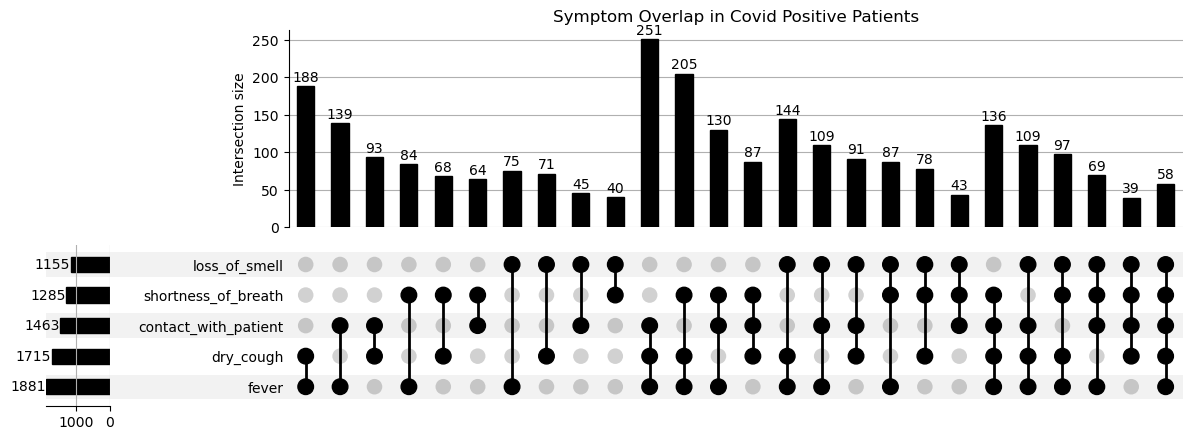

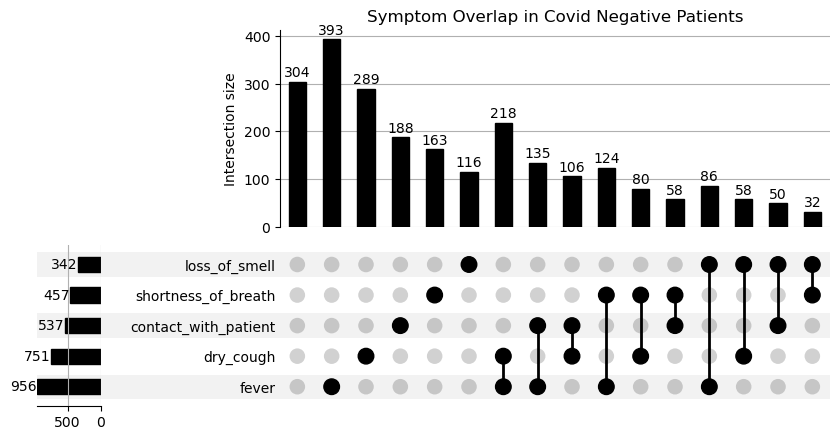

In [126]:
import warnings
warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    module="upsetplot"
)
from upsetplot import from_indicators, UpSet

upset_data_pos = from_indicators(symptom_pos, covid_pos[symptom_pos])
upset_data_neg = from_indicators(symptom_pos, covid_neg[symptom_pos])
UpSet(upset_data_pos, show_counts=True).plot()
plt.title('Symptom Overlap in Covid Positive Patients')
plt.show()

UpSet(upset_data_neg,show_counts=True).plot()
plt.title('Symptom Overlap in Covid Negative Patients')
plt.show()

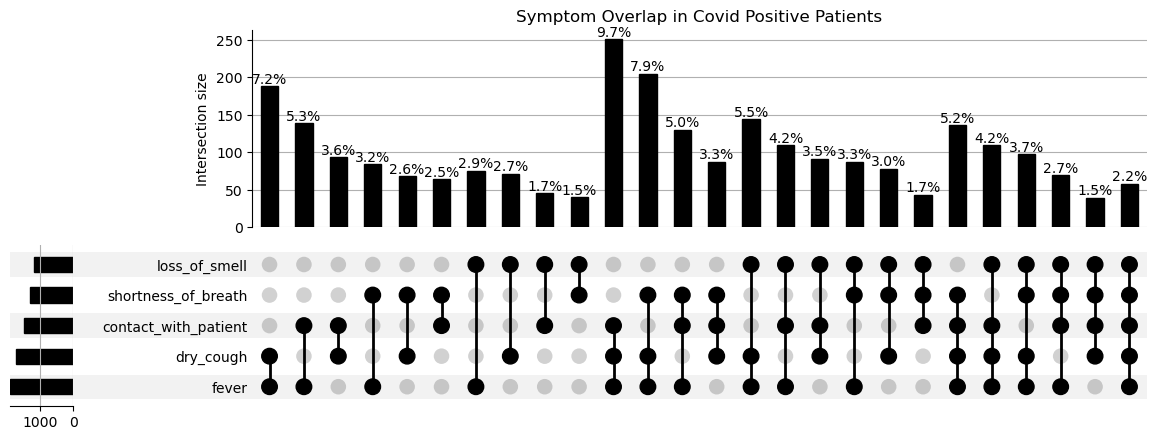

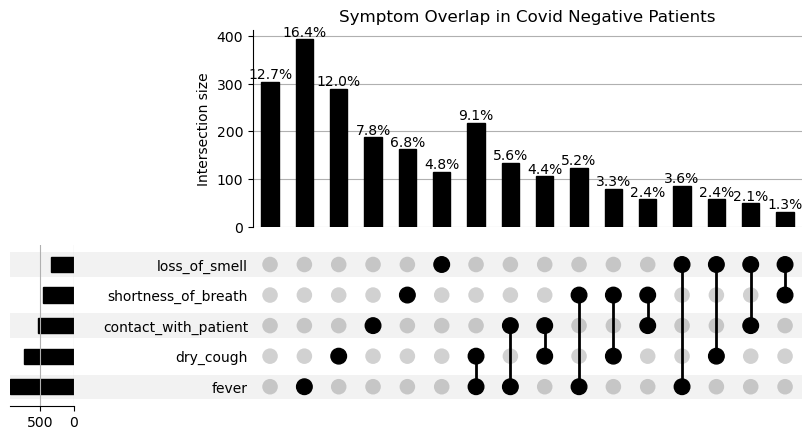

In [132]:
upset_data_pos = from_indicators(symptom_pos, covid_pos[symptom_pos])
upset_data_neg = from_indicators(symptom_pos, covid_neg[symptom_pos])
upset_pos = UpSet(upset_data_pos, show_counts=False)
axes = upset_pos.plot()
total_samples_pos = len(upset_data_pos)
ax = axes['intersections']
for patch in ax.patches:
    height = patch.get_height()
    pct = 100 * height / total_samples_pos
    ax.text(patch.get_x() + patch.get_width() / 2, height, f"{pct:.1f}%", ha="center", va="bottom")
plt.title('Symptom Overlap in Covid Positive Patients')
plt.show()


upset_neg = UpSet(upset_data_neg,show_counts=False)
axes1 = upset_neg.plot()
total_samples_neg = len(upset_data_neg)
ax = axes1['intersections']
for patch in ax.patches:
    height = patch.get_height()
    pct = 100 * height / total_samples_neg
    ax.text(patch.get_x() + patch.get_width() / 2, height, f"{pct:.1f}%", ha="center", va="bottom")
plt.title('Symptom Overlap in Covid Negative Patients')
plt.show()